### Scores Metadata Analysis

#### Importing the processed data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_meta = pd.read_csv('./data/processed/scores_metadata.csv')
df_scores = pd.read_csv('./data/processed/scores.csv')

#### General Overview

We check the scores metadata. We shall make an analysis of this dataset first.  
*Later, we will combine this dataset with the scores dataset. Particularly, we are interested in having the column `tonic_encoded` from the scores metadata together with the `notes` column in the scores data, so we can calculate the difference between the root (tonic) and each note, thus, getting what musical degrees are used with each note in a chromatic scale. From there, we might get which scales and scale degrees are used.*

In [3]:
df_meta.head(5)

,id,composer,composition,movement,ensemble,seconds,key,tonic,tonic_encoded
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,447,A major,A,9
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,251,A major,A,9
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,444,A major,A,9
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,368,A major,A,9
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,546,A major,A,9


In [4]:
df_meta.shape

(318, 9)

In [5]:
df_meta.dtypes

id                int64
composer         object
composition      object
movement         object
ensemble         object
seconds           int64
key              object
tonic            object
tonic_encoded     int64
dtype: object

In [6]:
# Changing type to column `tonic_encoded`
df_meta.tonic_encoded.astype("int64")

0       9
1       9
2       9
3       9
4       9
       ..
313     7
314     7
315    11
316     4
317     7
Name: tonic_encoded, Length: 318, dtype: int64

In [7]:
# Numeric variables summary
df_meta.describe()

,id,seconds,tonic_encoded
count,318.000000,318.000000,318.000000
mean,2257.685535,376.553459,5.166667
std,269.504116,197.580400,3.339925
min,1727.000000,55.000000,0.000000
25%,2118.250000,227.000000,3.000000
50%,2309.000000,356.500000,5.000000
75%,2481.750000,481.500000,9.000000
max,2678.000000,1069.000000,11.000000


Not really helpful, except for the `seconds` column stats. This column shows the duration for each piece.

In [8]:
# Checking duplicated rows
df_meta.duplicated().value_counts()

False    318
dtype: int64

In [9]:
# Checking for NaN values
df_meta.isna().any()

id               False
composer         False
composition      False
movement         False
ensemble         False
seconds          False
key              False
tonic            False
tonic_encoded    False
dtype: bool

#### Univariable analsysis

We start by plotting a histogram of the `seconds` column, which shows the duration of each piece.  
Then, we will do some countings, to see which composers have more compositions in this dataset, most popular keys, and most popular ensembles.

<AxesSubplot:>

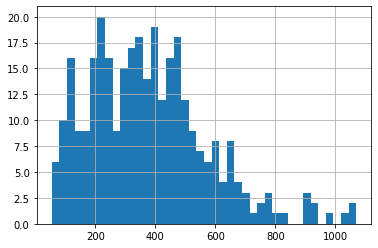

In [10]:
# Histogram of durations
df_meta.seconds.hist(bins=40)

In [11]:
# Who are the composers and how many pieces they have in this dataset?
df_meta.composer.value_counts()

Beethoven    157
Bach          55
Schubert      30
Mozart        24
Brahms        24
Cambini        9
Dvorak         8
Ravel          4
Faure          4
Haydn          3
Name: composer, dtype: int64

Beethoven    49.371069
Bach         17.295597
Schubert      9.433962
Mozart        7.547170
Brahms        7.547170
Cambini       2.830189
Dvorak        2.515723
Ravel         1.257862
Faure         1.257862
Haydn         0.943396
Name: composer, dtype: float64


<AxesSubplot:ylabel='composer'>

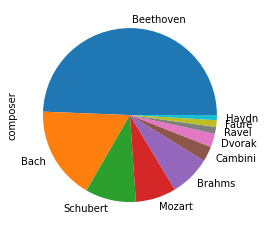

In [12]:
# What's the ratio of the number of compositions of each composer compared against the total?
print(df_meta.composer.value_counts(normalize=True)*100)

# Pie chart showing these ratios
df_meta.composer.value_counts().plot(kind='pie')

In [13]:
# What are the most common keys?
df_meta.key.value_counts()

E-flat major     42
A major          30
G major          24
B-flat major     24
C minor          21
F major          19
A minor          17
D major          17
G minor          16
C major          16
F minor          15
D minor          13
E major          12
E minor          10
A-flat major      9
B minor           7
C-sharp minor     7
F                 4
D-flat major      3
B major           2
F-sharp major     2
C-sharp major     2
F-sharp minor     2
G-sharp minor     2
B-flat minor      1
E-flat minor      1
Name: key, dtype: int64

E-flat major     13.207547
A major           9.433962
G major           7.547170
B-flat major      7.547170
C minor           6.603774
F major           5.974843
A minor           5.345912
D major           5.345912
G minor           5.031447
C major           5.031447
F minor           4.716981
D minor           4.088050
E major           3.773585
E minor           3.144654
A-flat major      2.830189
B minor           2.201258
C-sharp minor     2.201258
F                 1.257862
D-flat major      0.943396
B major           0.628931
F-sharp major     0.628931
C-sharp major     0.628931
F-sharp minor     0.628931
G-sharp minor     0.628931
B-flat minor      0.314465
E-flat minor      0.314465
Name: key, dtype: float64


<AxesSubplot:>

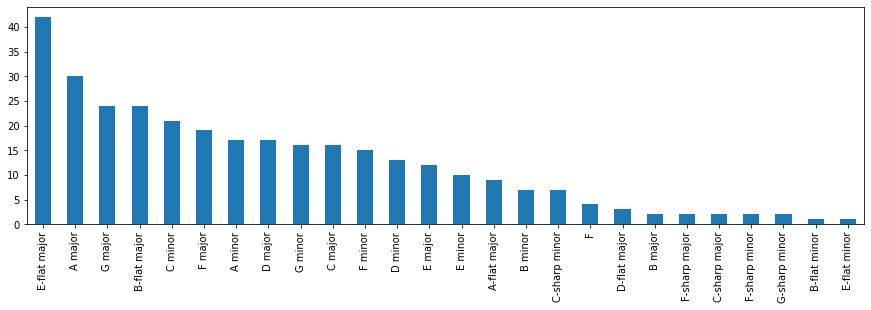

In [14]:
# Now the ratio for each key
print(df_meta.key.value_counts(normalize=True)*100)

# Bar chart for keys
df_meta.key.value_counts().plot(kind='bar', figsize=(15,4))

In [15]:
# What are the most common ensembles?
df_meta.ensemble.value_counts()

Solo Piano                     156
String Quartet                  57
Accompanied Violin              22
Solo Violin                      9
Wind Quintet                     9
Piano Quartet                    8
Accompanied Cello                7
Piano Trio                       7
Pairs Clarinet-Horn-Bassoon      6
String Sextet                    5
Violin and Harpsichord           4
Accompanied Clarinet             4
Horn Piano Trio                  4
Piano Quintet                    4
Wind Octet                       4
Clarinet Quintet                 3
Solo Flute                       3
Clarinet-Cello-Piano Trio        3
Wind and Strings Octet           2
Viola Quintet                    1
Name: ensemble, dtype: int64

Solo Piano            49.056604
String Quartet        17.924528
Accompanied Violin     6.918239
Solo Violin            2.830189
Wind Quintet           2.830189
Piano Quartet          2.515723
Name: ensemble, dtype: float64


<AxesSubplot:ylabel='ensemble'>

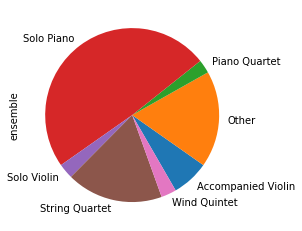

In [16]:
# Now the ratio for each ensemble (showing only top 6 ensembles)
print(df_meta.ensemble.value_counts(normalize = True).head(6)*100)


# Pie chart showing these ratios

s=df_meta.ensemble.value_counts() # Series with the count for each category

# Using the combination of groupby() (with np.where for condition) and sum() to create the category 'Others'
s.groupby(np.where(s>=8,s.index,'Other')).sum().plot(kind='pie',startangle=-60)


#### Multivariable analsysis


The only numeric variable of interest we have is the duration of the composition in the column `seconds`, so we will analyze it by categorical variables such as `composer`, `ensemble`, and `key`.  
We will also look for patterns between these categorical variables.


In [17]:
# Mean of duration by composer
df_meta.groupby(['composer'])['seconds'].mean()

composer
Bach         146.836364
Beethoven    414.961783
Brahms       480.458333
Cambini      286.333333
Dvorak       417.875000
Faure        490.750000
Haydn        296.000000
Mozart       391.083333
Ravel        410.750000
Schubert     506.266667
Name: seconds, dtype: float64

In [18]:
# Mean of duration by ensemble
df_meta.groupby(['ensemble'])['seconds'].mean()

ensemble
Accompanied Cello              536.142857
Accompanied Clarinet           300.500000
Accompanied Violin             402.863636
Clarinet Quintet               515.333333
Clarinet-Cello-Piano Trio      494.333333
Horn Piano Trio                447.750000
Pairs Clarinet-Horn-Bassoon    237.833333
Piano Quartet                  549.125000
Piano Quintet                  377.500000
Piano Trio                     390.285714
Solo Flute                     156.333333
Solo Piano                     352.807692
Solo Violin                    197.666667
String Quartet                 426.333333
String Sextet                  570.800000
Viola Quintet                  924.000000
Violin and Harpsichord         239.250000
Wind Octet                     338.250000
Wind Quintet                   286.333333
Wind and Strings Octet         396.000000
Name: seconds, dtype: float64

In [19]:
# Mean of duration, grouping by composer and ensemble
df_meta.groupby(['composer', 'ensemble'])['seconds'].mean().sort_values(ascending=False).reset_index()

,composer,ensemble,seconds
0,Schubert,Viola Quintet,924.000000
1,Brahms,Piano Quartet,607.500000
2,Brahms,String Sextet,570.800000
3,Brahms,Accompanied Cello,550.666667
4,Beethoven,Accompanied Cello,525.250000
5,Mozart,Clarinet Quintet,515.333333
6,Schubert,Solo Piano,511.000000
7,Beethoven,Clarinet-Cello-Piano Trio,494.333333
8,Faure,Piano Quartet,490.750000
9,Schubert,Piano Trio,490.000000


In [20]:
# Grouping by composer and ensemble, and counting the compositions
df_composer_ensemble = df_meta.groupby(['ensemble', 'key']).size().reset_index(name='counts')

In [21]:
# Top 20 combinations of ensemble and key
df_composer_ensemble.sort_values('counts',ascending=False).reset_index(drop=True).iloc[0:20]

,ensemble,key,counts
0,Solo Piano,C minor,15
1,Solo Piano,E-flat major,15
2,Solo Piano,A major,12
3,Solo Piano,D major,11
4,String Quartet,F major,10
5,Accompanied Violin,G major,9
6,Solo Piano,B-flat major,9
7,Solo Piano,A-flat major,9
8,Solo Piano,F minor,9
9,Solo Piano,D minor,8


In [22]:
# Grouping by composer and ensemble, and counting the compositions
df_meta.groupby(['composer', 'ensemble']).size().to_frame(name='counts').sort_values(['composer','counts'],ascending=[True,False])

counts
composer  ensemble                           
Bach      Solo Piano                       39
          Solo Violin                       9
          Violin and Harpsichord            4
          Solo Flute                        3
Beethoven Solo Piano                       93
          String Quartet                   28
          Accompanied Violin               22
          Accompanied Cello                 4
          Wind Octet                        4
          Clarinet-Cello-Piano Trio         3
          Pairs Clarinet-Horn-Bassoon       3
Brahms    String Sextet                     5
          Accompanied Clarinet              4
          Horn Piano Trio                   4
          Piano Quartet                     4
          Accompanied Cello                 3
          String Quartet                    2
          Wind and Strings Octet            2
Cambini   Wind Quintet                      9
Dvorak    String Quartet                    8
Faure     Piano Quartet                     4
Haydn     String Quartet                    3
Mozart    String Quartet                   12
          Piano Trio                        6
          Clarinet Quintet                  3
          Pairs Clarinet-Horn-Bassoon       3
Ravel     String Quartet                    4
Schubert  Solo Piano                       24
          Piano Quintet                     4
          Piano Trio                        1
          Viola Quintet                     1

We will create dataframes with the compositions with the most repeated ensembles and composers to dig in.

In [23]:
# "Solo Piano" compositions
df_solopiano = df_meta[df_meta['ensemble']=='Solo Piano']

# "String Quartet" compositions
df_strquartet = df_meta[df_meta['ensemble']=='String Quartet']

# "Accompanied Violin" compositions
df_accviolin = df_meta[df_meta['ensemble']=='Accompanied Violin']

In [24]:
# Beethoven's compositions
df_bet = df_meta[df_meta['composer']=='Beethoven']

# Bach's compositions
df_bach = df_meta[df_meta['composer']=='Bach']

# Schubert's compositions
df_schubert = df_meta[df_meta['composer']=='Schubert']

# Mozart's compositions
df_mozart = df_meta[df_meta['composer']=='Mozart']

#### *experiments*

From here on, sketches to be developed

In [25]:
df_bet.key.value_counts()

E-flat major     28
G major          18
A major          17
C minor          13
B-flat major     11
F major          11
C major           8
D major           7
F minor           7
D minor           6
A-flat major      6
E major           6
A minor           6
C-sharp minor     5
E minor           5
G minor           2
F-sharp major     1
Name: key, dtype: int64

### After merged

In [26]:
# I'll add a column indicating the difference between each note played and the tonic of the composition
# This way, we'll know which notes on a chromatic scale are being used
# Thus, we may determine which scales are used

#df_scores['chromatic_degree'] = df_scores.note - df_scores.tonic_encoded

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=177ea176-1f94-4265-9666-0cca06278d8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>